<a href="https://colab.research.google.com/github/sowmR/PILSample/blob/main/PILSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

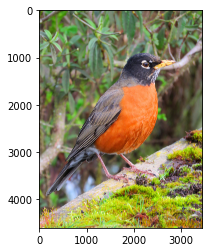

In [36]:
# update the file path to the actual image location before running the below statement
imageFile = "./robin_bird_birding_nature.jpg"
image = PIL.Image.open(imageFile)
plt.imshow(image)

In [11]:
print(image.size)
print(image.mode)
print(image.format)

(3456, 4608)
RGB
JPEG


In [12]:
# save image
newImg = image.save('newImage.jpg')

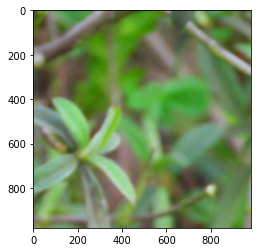

In [14]:
#crop image
left = 20
top = 20
right = 1000
bottom =1000
crpImg = image.crop((left,top,right,bottom))
plt.imshow(crpImg)

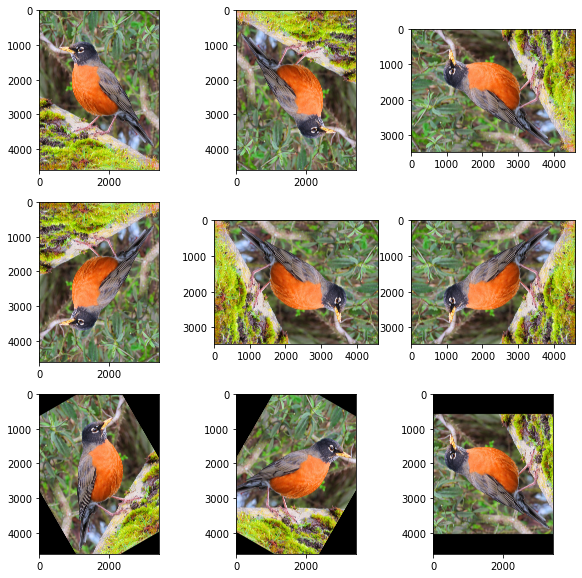

In [19]:
# make a copy of the image
copiedImg = image.copy()
# Transposing
ti1 = image.transpose(PIL.Image.FLIP_LEFT_RIGHT)
ti2 = image.transpose(PIL.Image.FLIP_TOP_BOTTOM)
ti3 = image.transpose(PIL.Image.ROTATE_90)
ti4 = image.transpose(PIL.Image.ROTATE_180)
ti5 = image.transpose(PIL.Image.ROTATE_270)
ti6 = image.transpose(PIL.Image.TRANSPOSE)
ti7 = image.rotate(30)
ti8 = image.rotate(-30)
ti9 = image.rotate(90)
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(ti1)
plt.subplot(3,3,2)
plt.imshow(ti2)
plt.subplot(3,3,3)
plt.imshow(ti3)
plt.subplot(3,3,4)
plt.imshow(ti4)
plt.subplot(3,3,5)
plt.imshow(ti5)
plt.subplot(3,3,6)
plt.imshow(ti6)
plt.subplot(3,3,7)
plt.imshow(ti7)
plt.subplot(3,3,8)
plt.imshow(ti8)
plt.subplot(3,3,9)
plt.imshow(ti9)

## resize

 Image can be resized with respect to width and height.

 resize will take the width and height as tuple

 Reducing or increasing the size involves various algorithms called interpolation.

 ### Available Interpolation techniques:

  **Nearest** : It is the simplest. But poor quality. Pick one nearest pixel from the input image and ignore the rest.

  **BOX** :  Each pixel in the source image = (pixel in destination image) X (identical weight). Not a recommented option

  **BiLinear** : Decent quality. For resize calculate the output pixel value using linear interpolation of all pixels that may contribute to the output valie

  **hamming** : Produce a sharper image than BiLinear, doesn't have dislocation of the local level like in BOX

  **bicubic** : expensive in time-wise. Better quality. Sharper image.

  **lanczos** : expensive  in terms of time. Better quality. Sharper image


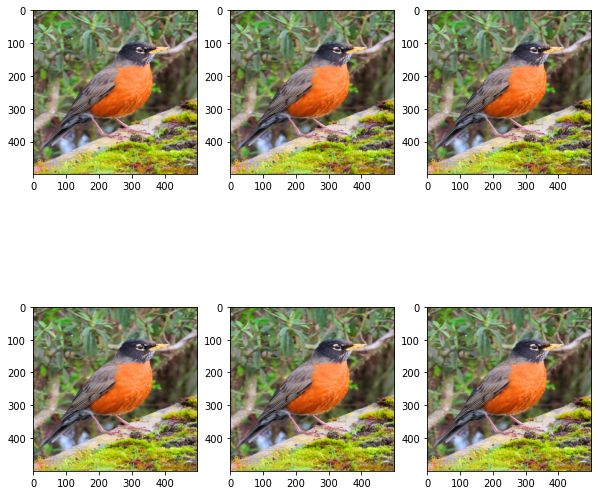

In [17]:
# resizing the image
newsize = (500,500)
ri1 = image.resize(newsize, PIL.Image.BILINEAR)
ri2 = image.resize(newsize, PIL.Image.BOX)
ri3 = image.resize(newsize, PIL.Image.NEAREST)
ri4 = image.resize(newsize, PIL.Image.HAMMING)
ri5 = image.resize(newsize, PIL.Image.BICUBIC)
ri6 = image.resize(newsize, PIL.Image.LANCZOS)

plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(ri1)
plt.subplot(2,3,2)
plt.imshow(ri2)
plt.subplot(2,3,3)
plt.imshow(ri3)
plt.subplot(2,3,4)
plt.imshow(ri4)
plt.subplot(2,3,5)
plt.imshow(ri5)
plt.subplot(2,3,6)
plt.imshow(ri6)

## Add overlay

Required functions ImageDraw, ImageFont


ImageFont is used to set the font for the overlayed text

**Syntax**: PIL.ImageFont.truetype(font=None, size=10, index=0, encoding=”)

*Parameters*:

font – A truetype font file. Under Windows, if the file is not found in this filename, the loader also looks in Windows fonts/ directory.

size – The requested size, in points.

index – Which font face to load (default is first available face).

encoding – Which font encoding to use (default is Unicode).

Returns: A font object.

Exception: IOError – If the file could not be read.




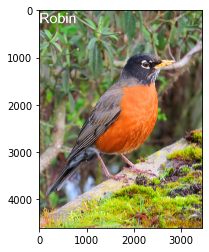

In [46]:
# add Text overlay
from PIL import ImageDraw, ImageFont
wi = PIL.Image.open(imageFile)
imdraw = ImageDraw.Draw(wi)
fnt = ImageFont.truetype("arial.ttf",300) # set font type and size

#(position, text, textcolor, font)
# position = (left, top)
# textcolor = (r,g,b)
imdraw.text((5,5), "Robin",(255,255,255),fnt)
plt.imshow(wi)

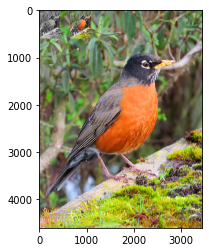

In [52]:
# add image overlay
# overlay a B/W image
ti1 = PIL.Image.open(imageFile)
ti1.thumbnail((600,600)) # preserve the aspect ratio
# convert the thumbnail to B/W
ti1 = ti.convert('L')
# overlay a Hue image
ti2 = PIL.Image.open(imageFile)
ti2.thumbnail((600,600)) # preserve the aspect ratio
# convert the thumbnail to B/W
ti2 = ti2.convert('HSV')

oi = PIL.Image.open(imageFile)
oi.paste(ti1,(5,5))
oi.paste(ti2,(655,5))
plt.imshow(oi)


#### overlay one image over other using alpha blending

Alpha value can be between 0 and 1. If it is out of this range, the image will be clipped for this value. 

**There are 2 rules in the alpha blending. **

1) both images should be of same size

2) Both images should have alpha channel (Eg: png format)

**blend function takes 2 arguments:**

- input argument = (image1, image2, alpha)

- outputImage  = image1 * (1.0 - alpha)+ image2 * alpha






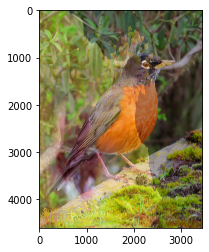

In [68]:
im1 = PIL.Image.open(imageFile)
im2 = PIL.Image.open('hibiscus.jpg')
im2 = im2.resize(im1.size)
alpha = 0.3
blImd = PIL.Image.blend(im1,im2,alpha)
plt.imshow(blImd)

(4608, 3456, 3)


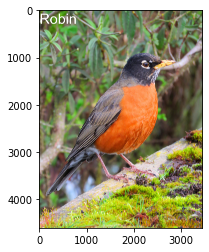

In [54]:
# image as numpy array
numpy_array = np.array(image)
print(numpy_array.shape) # return (height, width,dim)
npImage = Image.fromarray(numpy_array)
plt.imshow(npImage)

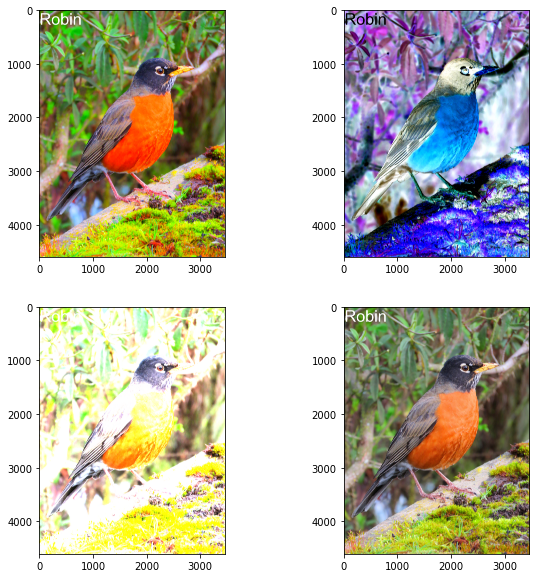

In [59]:
# image enhancement
'''
 enhance functions takes one argument of type float.  
 base value is 1 which will be for original image.
 >1 to increase the enhancement
 <1 to decrease the enhancement
 '''
from PIL import ImageEnhance as IE 
eI = image.copy()
ei1 = IE.Color(eI).enhance(1.9)
ei2 = IE.Contrast(eI).enhance(-1.5)
ei3 = IE.Brightness(eI).enhance(2.5)
ei4 = IE.Sharpness(eI).enhance(2.5)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(ei1)
plt.subplot(2,2,2)
plt.imshow(ei2)
plt.subplot(2,2,3)
plt.imshow(ei3)
plt.subplot(2,2,4)
plt.imshow(ei4)

